In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y, ylim):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors = []
    val_errors = []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_pred = model.predict(X_train[:m])
        y_val_pred = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_pred))
        val_errors.append(mean_squared_error(y_val, y_val_pred))
    train_errors = np.sqrt(train_errors)
    val_errors = np.sqrt(val_errors)
    plt.figure()
    plt.title('Learning curve')
    plt.plot(train_errors, 'b', label='Train error')
    plt.plot(val_errors, 'r', label='Validation error')
    plt.ylim(ylim)
    plt.grid()
    plt.legend()
    plt.show()

In [2]:
m = 100
noise = np.random.rand(m, 1)
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + noise

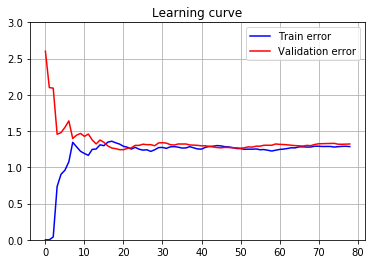

In [3]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, ylim=[0, 3])

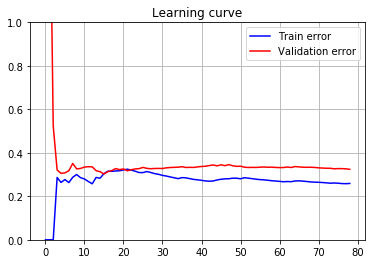

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

second_order_poly_features = PolynomialFeatures(degree=2, include_bias=False)

second_poly_reg = Pipeline([
    ("second_order_poly_features", second_order_poly_features),
    ("linear regressor", LinearRegression())
])

plot_learning_curves(second_poly_reg, X, y, ylim=[0, 1])

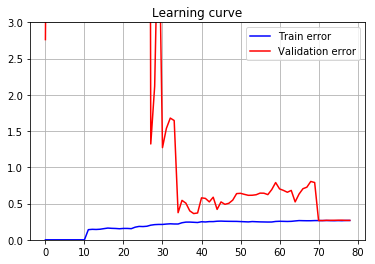

In [5]:
high_order_poly_features = PolynomialFeatures(degree=10, include_bias=False)
high_poly_reg = Pipeline([
    ("high_order_poly_features", high_order_poly_features),
    ("linear regressor", LinearRegression())
])

plot_learning_curves(high_poly_reg, X, y, ylim=[0, 3])